# IS 4487 Assignment 5: Exploratory Data Analysis (EDA) with Stakeholder Framing

In this assignment, you will:
- Load and explore a hotel bookings dataset
- Identify stakeholder needs and frame your analysis around business goals
- Practice data summarization and visualization
- Draw insights that could lead to actionable business recommendations

## Why This Matters

These skills are essential for business majors and minors working in areas like marketing, operations, finance, or consulting. Understanding how to explore and communicate data-driven insights helps you make better decisions and contribute to real-world business outcomes.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_05_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.


## 1. Setup and Data Loading

Instructions:
- Import `pandas`, `seaborn`, and `matplotlib.pyplot`.
- Load the dataset from this URL:
  https://github.com/Stan-Pugsley/is_4487_base/blob/d764a81fe649c397a1f5b35f1e1ceda48b5178d1/DataSets/hotels.csv?raw=true
- Display the first few rows to confirm it loaded correctly.


In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/d764a81fe649c397a1f5b35f1e1ceda48b5178d1/DataSets/hotels.csv'
df = pd.read_csv(url)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. Stakeholder and Business Context

Business framing:  

Every analysis should serve a decision-maker. Before you explore the data, identify who cares about hotel booking behavior and what they might want to know. Your analysis should be framed around those needs.

### In your markdown:
1. Who are the key stakeholders for this dataset?
2. What goals might each stakeholder have?
3. What is a clear, specific business problem statement that this data can help answer?





### ✍️ Your Response: 🔧
1. The stakeholders of this dataset are Hotel Revenue Managers, operations and front desk managers, marketing and sales team, and hotel executives plus owners.

2. Revenue Managers: Optimize ADR (Average Daily Rate) while minimizing revenue loss from cancellations. Operations Managers: Forecast occupancy accurately to avoid over/under staffing and resource misallocation. Marketing/Sales: Identify profitable guest types (transient, group, contract) and refine promotions accordingly. Executives/Owners: Improve financial performance by balancing occupancy, ADR, and guest satisfaction

3. How can hotels decrease cancellations and boost revenue by analyzing the connections between lead time, guest type, and pricing?




## 3. Explore Data Structure and Quality

Business framing:  

Before diving into analysis, analysts need to understand the shape and health of the data. Bad data leads to bad decisions.

- Perform the following 3 checks to see the data quality:
  - Summary the data (e.g., `.info()`, `.describe()`)
  - Find the number of Null values
  - Find the number of duplicate row checks
- Flag any issues you notice (e.g., missing values, formatting problems)

In [28]:
print("=== DATA SUMMARY ===")
df.info()
print("\n=== DESCRIPTIVE STATISTICS ===")
display(df.describe(include="all").T)

print("\n=== MISSING VALUES PER COLUMN ===")
nulls = df.isnull().sum()
print(nulls)

print("\n=== DUPLICATE ROWS ===")
dupes = df.duplicated().sum()
print(f"Number of duplicate rows: {dupes}")

print("\n=== FLAGGED ISSUES ===")
if nulls.sum() > 0:
    print("⚠️ Missing values detected in the following columns:")
    print(nulls[nulls > 0])
else:
    print("✅ No missing values found.")

if dupes > 0:
    print(f"⚠️ Found {dupes} duplicate rows in the dataset.")
else:
    print("✅ No duplicate rows found.")

print("\n=== POTENTIAL FORMATTING ISSUES (OBJECT COLUMNS) ===")
object_cols = df.select_dtypes(include='object').columns
if len(object_cols) > 0:
    print("Consider checking the unique values and data types for consistency in the following object columns:")
    for col in object_cols:
        print(f"- {col}")
else:
    print("✅ No object columns found that might have formatting issues.")

=== DATA SUMMARY ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
lead_time,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,NaN,NaN,NaN,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0



=== MISSING VALUES PER COLUMN ===
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                 

### In your markdown:
1. What structural issues or problems did you find?
2. What actions would you recommend to clean or prepare this dataset for use?

### ✍️ Your Response: 🔧
1. some strutural problems I found are that several columns have missing values. there is also over 31994 duplicated rows in the dataset. there is also some formating issues in object columns, columns like hotel, arrival_date_month, meal, country, and market_segment may contain inconsistent strig values or need proper data type conversion.
2. Some actions that I would recommend to clean or prepare this dataset is first removing all the duplicated rows, for missing values I would consider filling the values or flagging them as unknown. I would also Recast categorical columns (hotel, market_segment, customer_type, etc.) as category dtype to optimize memory and analysis.



## 4. Univariate Analysis

Business framing:  

Hotels care about trends like average stay length, customer mix, and pricing. A good EDA starts with understanding single variables and their distribution.

- Select at least 3 individual variables to explore
- Use plots and summary methods (e.g. info(), describe(), etc)  to describe the distribution (hint: we are only looking at the values of one variable, so think of plots you've used in the past that DON'T compare 2 variables.)
- Focus on what matters from a business standpoint (e.g., pricing, cancellations, guest types)

--- Analyzing Variable: adr ---

--- Info ---
<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: adr
Non-Null Count   Dtype  
--------------   -----  
119390 non-null  float64
dtypes: float64(1)
memory usage: 932.9 KB

--- Descriptive Statistics ---


,adr
count,119390.000000
mean,101.831122
std,50.535790
min,-6.380000
25%,69.290000
50%,94.575000
75%,126.000000
max,5400.000000


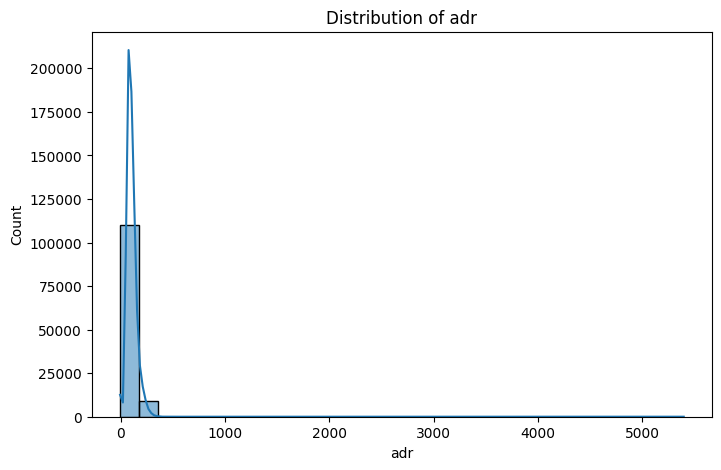



--- Analyzing Variable: stays_in_weekend_nights ---

--- Info ---
<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: stays_in_weekend_nights
Non-Null Count   Dtype
--------------   -----
119390 non-null  int64
dtypes: int64(1)
memory usage: 932.9 KB

--- Descriptive Statistics ---


,stays_in_weekend_nights
count,119390.000000
mean,0.927599
std,0.998613
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,19.000000


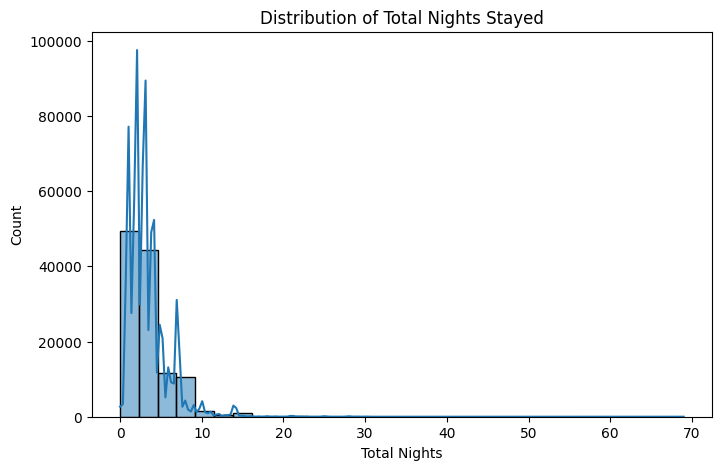



--- Analyzing Variable: stays_in_week_nights ---

--- Info ---
<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: stays_in_week_nights
Non-Null Count   Dtype
--------------   -----
119390 non-null  int64
dtypes: int64(1)
memory usage: 932.9 KB

--- Descriptive Statistics ---


,stays_in_week_nights
count,119390.000000
mean,2.500302
std,1.908286
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,50.000000


--- Analyzing Variable: customer_type ---

--- Info ---
<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: customer_type
Non-Null Count   Dtype 
--------------   ----- 
119390 non-null  object
dtypes: object(1)
memory usage: 932.9+ KB

--- Descriptive Statistics ---


,customer_type
count,119390
unique,4
top,Transient
freq,89613


<Figure size 800x500 with 0 Axes>

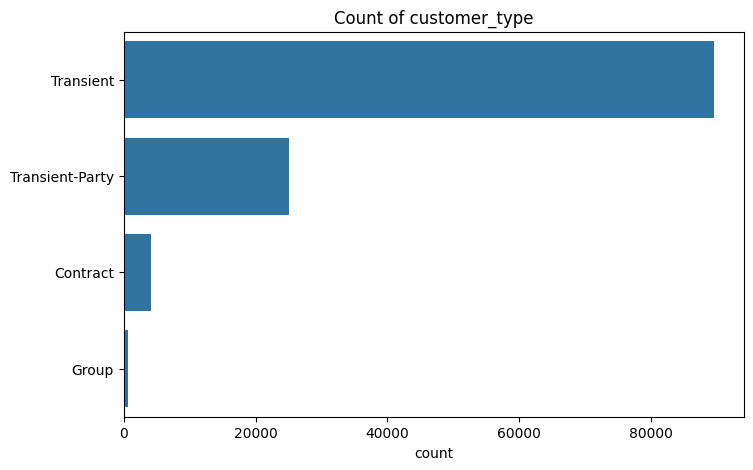


--- Value Counts ---
customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64


--- Analyzing Variable: is_canceled ---

--- Info ---
<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: is_canceled
Non-Null Count   Dtype
--------------   -----
119390 non-null  int64
dtypes: int64(1)
memory usage: 932.9 KB

--- Descriptive Statistics ---


,is_canceled
count,119390.000000
mean,0.370416
std,0.482918
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


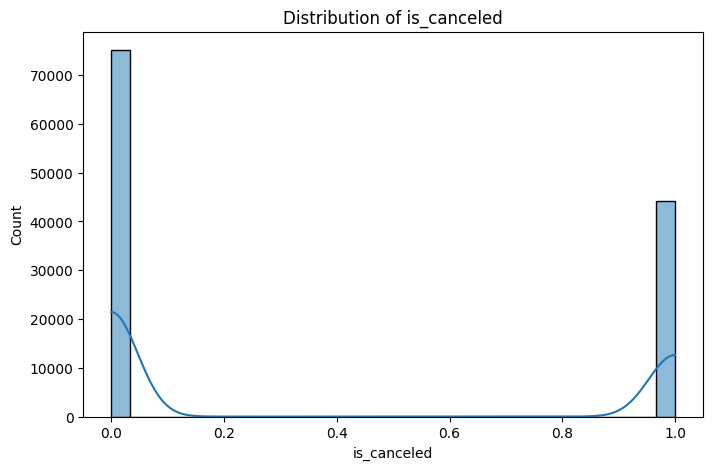


--- Value Counts ---
is_canceled
0    75166
1    44224
Name: count, dtype: int64




In [30]:
# Select variables for univariate analysis
variables_to_explore = ['adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'customer_type', 'is_canceled']

for var in variables_to_explore:
    print(f"--- Analyzing Variable: {var} ---")
    print("\n--- Info ---")
    df[var].info()
    print("\n--- Descriptive Statistics ---")
    display(df[var].describe())

    # Visualize distributions
    plt.figure(figsize=(8, 5))
    if df[var].dtype in ['int64', 'float64']:
        # Combine weekend and week nights for total stays visualization
        if var in ['stays_in_weekend_nights', 'stays_in_week_nights']:
            if var == 'stays_in_weekend_nights':
                total_stays = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
                sns.histplot(total_stays, kde=True, bins=30)
                plt.title('Distribution of Total Nights Stayed')
                plt.xlabel('Total Nights')
            else:
                 # Skip plotting week nights separately if total stays is plotted
                 continue
        else:
            sns.histplot(df[var], kde=True, bins=30)
            plt.title(f'Distribution of {var}')
    elif df[var].dtype == 'object' or var == 'is_canceled': # Include is_canceled as a categorical-like variable
        sns.countplot(data=df, y=var if var != 'is_canceled' else None, x=var if var == 'is_canceled' else None, order=df[var].value_counts().index if var != 'is_canceled' else [0, 1])
        plt.title(f'Count of {var}')
        if var != 'is_canceled':
            plt.ylabel('') # Remove y-axis label for countplots
    plt.show()

    # Print counts of unique values for categorical variables
    if df[var].dtype == 'object' or var == 'is_canceled':
        print("\n--- Value Counts ---")
        print(df[var].value_counts())
    print("\n" + "="*50 + "\n")

### In your markdown:
1. Variable 1 – What did you explore and what did you find?
2. Variable 2 – What did you explore and what did you find?
3. Variable 3 – What did you explore and what did you find?

### ✍️ Your Response: 🔧
**Variable 1 (ADR - Average Daily Rate) – Summary and insights:** The distribution of ADR shows a wide range of prices, with a peak around the lower end. There are some outliers with very high ADR values. This suggests the hotel offers a variety of price points, but the majority of bookings are at lower rates. From a business standpoint, this could indicate a focus on budget-conscious travelers or a need to explore strategies for increasing revenue through higher-priced bookings or packages.
- **Variable 2 (Total Stays - Weekend and Week Nights) – Summary and insights:** The distribution of total stays is heavily skewed towards shorter stays (1-4 nights). The majority of guests stay for only a few nights. This highlights the importance of optimizing operations and services for short-term guests. It might also be beneficial to investigate if there are opportunities to encourage longer stays through promotions or tailored offerings.
- **Variable 3 (Customer Type) – Summary and insights:** The majority of bookings are from "Transient" customers, followed by "Contract" and "Transient-Party". "Group" bookings are the least frequent. This indicates that the hotel primarily attracts individual travelers and those with pre-arranged contracts. Marketing efforts could focus on strengthening relationships with transient guests and exploring strategies to attract more group bookings or other customer segments.

## 5. Bivariate Analysis

Business framing:  

Stakeholders often ask: “What drives cancellations?” or “Do longer stays mean higher revenue?” Bivariate analysis helps you uncover those kinds of relationships.

- Choose 2 relevant variable pairs (e.g., `lead_time` vs. `is_canceled`, or `adr` vs. `customer_type`)
- Use scatterplots, grouped bar plots, or boxplots to explore the relationships
- Interpret what these relationships could mean for the hotel business

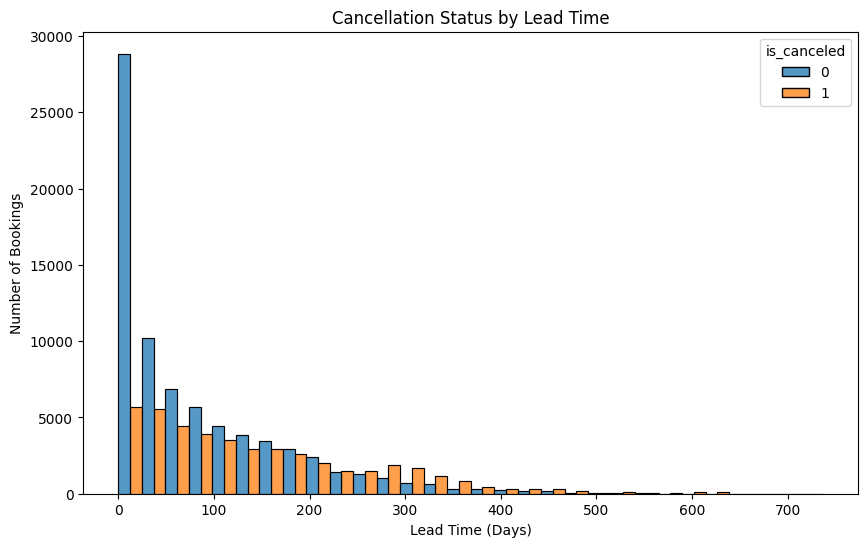

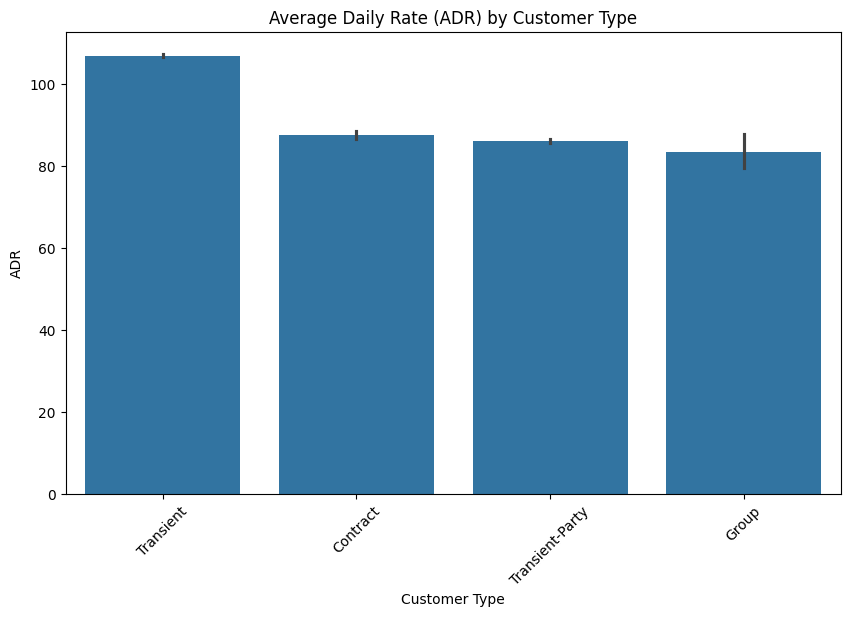

In [43]:
# Bivariate Analysis

# Relationship 1: Lead Time vs. Is Canceled
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lead_time', hue='is_canceled', multiple='dodge', bins=30, kde=False)
plt.title('Cancellation Status by Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Number of Bookings')
plt.show()

# Relationship 2: ADR vs. Customer Type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='customer_type', y='adr')
plt.title('Average Daily Rate (ADR) by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('ADR')
plt.xticks(rotation=45)
plt.show()

### In your markdown:
1. Relationship 1 – What did you analyze and what insights did you find?
2. Relationship 2 – What did you analyze and what insights did you find?

### ✍️ Your Response: 🔧
- **Relationship 1:**  most booking have short lead times, with cancellations present by not dominant. As the lead time increases the cancellations rise noticably. Very long lead times are much less frequent, and have a relativly high cancellation rate. For the business this tells us that customers booking far in advance are more likely to cancel their plans. Hotels could adopt stricter cancellation policies or non-refundable rates for long lead-time reservations.
- **Relationship 2:**  The customer type of Transient have the highest ADR compared to the rest of them. The rest pay significantly less on average than the rest. Transient customers are the most profitable per booking, making them a high-value target segment. Groups and contract customers provide lower ADRs, but they may bring in bulk bookings and help maintain occupancy during low-demand periods.


## 6. Problem Complexity and Analytics Framing

Business framing:  

Let’s say you found a strong trend — maybe high lead times predict cancellations, or certain channels bring repeat guests. What kind of problem is this?

- Choose one insight from your earlier analysis
- Reflect on:
  - What type of complexity this problem represents (e.g., variety, volume, variability)
  - What kind of analytics would help solve or explain it (descriptive, diagnostic, predictive, prescriptive)

### In your markdown:
1. What was your selected insight?
2. What kind of complexity does it involve?
3. What type of analytics would help, and why?



### ✍️ Your Response: 🔧
1. The selected insight was bookings with higher lead times are more likely to be cancled.
2. The type of complexity this problem represents is variability
3. The type of analytics that would help are Descriptive analytics it can be used to summarize historical cancellation rates across lead times and customer types to show the scope of the issue, and Diagnostic analytics can explain why cancellations are higher.



## 7. Final Takeaways and Recommendations

Business framing:  

Imagine you’re preparing for a stakeholder meeting. What would you highlight from your findings?

- Identify your top 2–3 insights or patterns
- Connect each to a stakeholder need or business goal
- Make one recommendation based on the analysis

### In your markdown:
1. What patterns or trends stood out?
2. How do they connect to stakeholder goals?
3. What recommendation would you make based on this analysis?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. Some patterns and trends that stood out were Longer lead times were strongly associated with a higher likelihood of booking cancellations, Transient customers generated the highest ADR compared to groups, contracts, or transient-parties, and Average booking prices showed steady growth over time, despite some fluctuations.

2. These connect to stakeholder goals by Safeguarding Revenue cancellations associated with extended lead times pose a threat to revenue predictability.Pricing Strategy, analyzing ADR based on customer type aids in establishing rates that are both competitive and profitable. Forecasting and Planning,increases in average prices guide financial predictions and inventory management strategies.

3. Implement stricter cancellation policies or require deposits for bookings with long lead times to minimize revenue loss. Simultaneously, focus on attracting transient customers by offering customized promotions, as they tend to generate higher average daily rates and greater profitability.

4. This analysis aligns with my objective of utilizing business analytics techniques to evaluate market risk and volatility trends. By pinpointing cancellation risks associated with long lead times and differences in ADR among various customer segments, I am honing the ability to detect volatility patterns within business operations. These insights are reflective of the essential skills required in corporate consulting and portfolio risk management, where comprehending uncertainty and implementing data-driven strategies facilitate more informed and robust decision-making.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas


In [45]:
!jupyter nbconvert --to html "assignment_05_LastnameFirstname.ipynb"

[NbConvertApp] Converting notebook assignment_05_LastnameFirstname.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 549032 bytes to assignment_05_LastnameFirstname.html
